In [1]:
# imports


import pandas as pd
import geopandas as gpd

In [3]:
# load data
df = pd.read_csv('AeroConnectData.csv')

In [4]:
# streamline data so it has route and date column
df['Route'] = df['AustralianPort'] + ' <-> ' + df['ForeignPort'] + ' (' + df['Country'] + ')'
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month_num'].astype(str) + '-01')


top passenger routes
Route
Sydney <-> Auckland (New Zealand)        2961212
Sydney <-> Singapore (Singapore)         1440018
Sydney <-> Tokyo (Japan)                 1292116
Sydney <-> Hong Kong (Hong Kong)         1151900
Perth <-> Singapore (Singapore)           952926
Brisbane <-> Auckland (New Zealand)       893246
Sydney <-> Christchurch (New Zealand)     882357
Melbourne <-> Singapore (Singapore)       865251
Sydney <-> Los Angeles (USA)              862964
Sydney <-> Honolulu (USA)                 861814
Name: Passengers_Total, dtype: int64
top freight routes
Route
Sydney <-> Auckland (New Zealand)       126712.789
Sydney <-> Tokyo (Japan)                 79155.928
Sydney <-> Singapore (Singapore)         69312.404
Sydney <-> Los Angeles (USA)             68730.618
Perth <-> Singapore (Singapore)          53565.240
Sydney <-> Hong Kong (Hong Kong)         51612.532
Melbourne <-> Singapore (Singapore)      49391.343
Melbourne <-> Auckland (New Zealand)     42042.812
Melbourne <->

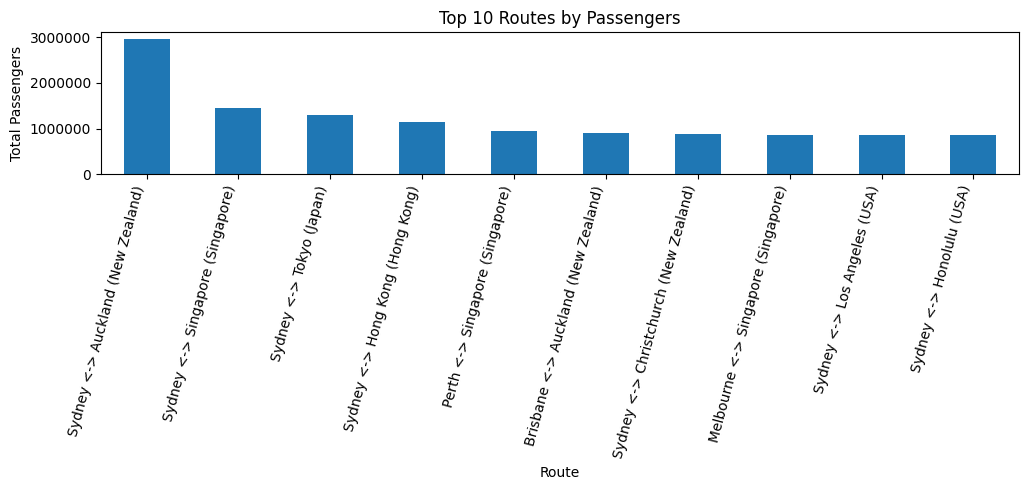

bottom passenger routes
Route
Melbourne <-> Denver (USA)                0
Brisbane <-> Colombo (Sri Lanka)          0
Brisbane <-> Chicago (USA)                0
Perth <-> Bandar Seri Begawan (Brunei)    0
Adelaide <-> Harare (Zimbabwe)            0
Townsville <-> San Francisco (USA)        1
Cairns <-> Honiara (Solomon Islands)      1
Darwin <-> Zagreb (Yugoslavia)            1
Hobart <-> Tokyo (Japan)                  1
Hobart <-> Los Angeles (USA)              2
Name: Passengers_Total, dtype: int64
bottom freight routes
Route
Townsville <-> Zagreb (Yugoslavia)     0.0
Darwin <-> Kuala Lumpur (Malaysia)     0.0
Darwin <-> Copenhagen (Denmark)        0.0
Darwin <-> Bombay (India)              0.0
Darwin <-> Belgrade (Yugoslavia)       0.0
Sydney <-> Ljubljana (Yugoslavia)      0.0
Cairns <-> Wellington (New Zealand)    0.0
Cairns <-> Papeete (Tahiti)            0.0
Cairns <-> Nagoya (Japan)              0.0
Cairns <-> Manchester (UK)             0.0
Name: Freight_Total_(tonnes), dtype

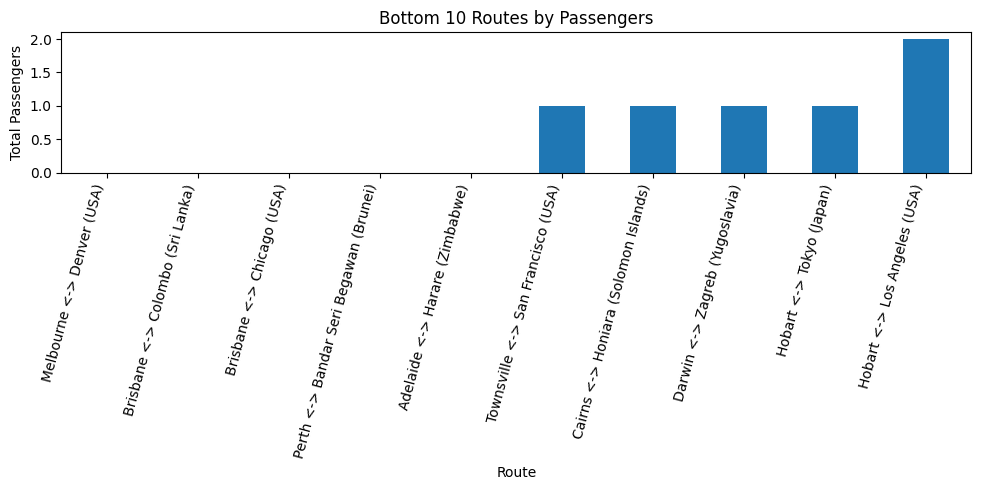

In [5]:
# 1a: most trafficked routes
numRoutes = 10
top_routes_passengers = df.groupby('Route')['Passengers_Total'].sum().sort_values(ascending=False).head(numRoutes)
top_routes_freight = df.groupby('Route')['Freight_Total_(tonnes)'].sum().sort_values(ascending=False).head(numRoutes)
top_routes_mail = df.groupby('Route')['Mail_Total_(tonnes)'].sum().sort_values(ascending=False).head(numRoutes)
print("top passenger routes")
print(top_routes_passengers)
print("top freight routes")
print(top_routes_freight)
print("top mail routes")
print(top_routes_mail)
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
top_routes_passengers.plot(kind='bar')
plt.title("Top 10 Routes by Passengers")
plt.ylabel("Total Passengers")
plt.xlabel("Route")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.show()
# 1a: least trafficked routes
numRoutes = 10
top_routes_passengers = df.groupby('Route')['Passengers_Total'].sum().sort_values(ascending=True).head(numRoutes)
top_routes_freight = df.groupby('Route')['Freight_Total_(tonnes)'].sum().sort_values(ascending=True).head(numRoutes)
top_routes_mail = df.groupby('Route')['Mail_Total_(tonnes)'].sum().sort_values(ascending=True).head(numRoutes)
print("bottom passenger routes")
print(top_routes_passengers)
print("bottom freight routes")
print(top_routes_freight)
print("bottom mail routes")
print(top_routes_mail)




import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
top_routes_passengers.plot(kind='bar')
plt.title("Bottom 10 Routes by Passengers")
plt.ylabel("Total Passengers")
plt.xlabel("Route")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.show()


Annual Traffic Growth:
1985: 5,200,373 passengers (first year)
1986: 5,818,437 passengers (+618,064 passengers, +11.9%)
1987: 6,714,432 passengers (+895,995 passengers, +15.4%)
1988: 7,766,782 passengers (+1,052,350 passengers, +15.7%)
1989: 3,795,339 passengers (-3,971,443 passengers, -51.1%)


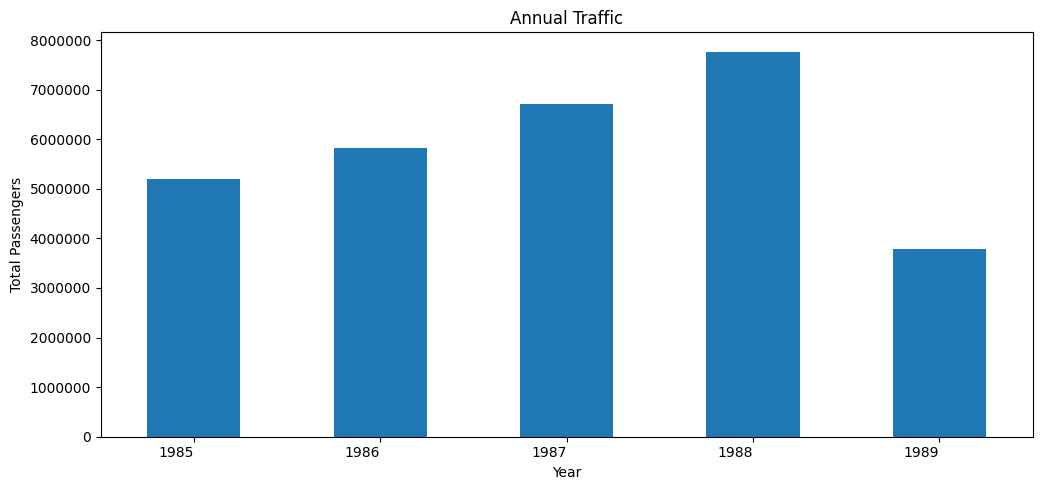

In [6]:

# 1b: growth by year


# Annual trends
annual_traffic = df.groupby('Year')['Passengers_Total'].sum()
print("Annual Traffic Growth:")
annual_growth = annual_traffic.pct_change() * 100
for year in annual_traffic.index:
   if year > 1985:
       growth_pct = annual_growth[year]
       growth_absolute = annual_traffic[year] - annual_traffic[year-1]
       if growth_absolute > 0:
           print(f"{year}: {annual_traffic[year]:,} passengers (+{growth_absolute:,} passengers, +{growth_pct:.1f}%)")
       else:
           print(f"{year}: {annual_traffic[year]:,} passengers (-{-1*growth_absolute:,} passengers, -{-1*growth_pct:.1f}%)")
   else:
       print(f"{year}: {annual_traffic[year]:,} passengers (first year)")


import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
annual_traffic.plot(kind='bar')
plt.title("Annual Traffic")
plt.ylabel("Total Passengers")
plt.xlabel("Year")
plt.xticks(rotation=0, ha="right")
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.show()


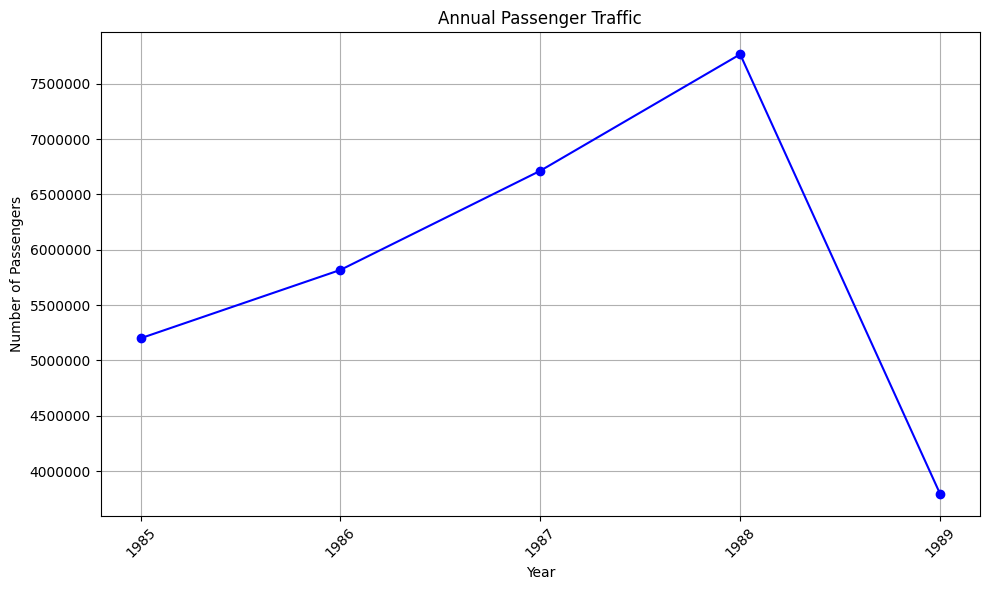

In [7]:

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(annual_traffic.index, annual_traffic.values, marker='o', linestyle='-', color='blue')
plt.title("Annual Passenger Traffic")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.xticks(annual_traffic.index, rotation=45)


# Force normal number formatting on y-axis
plt.ticklabel_format(style='plain', axis='y')


plt.tight_layout()
plt.show()




Geographic Hotspots:
Top 5 Countries:
1. New Zealand: 7,881,613 passengers (26.9%)
2. Singapore: 4,130,761 passengers (14.1%)
3. USA: 3,084,101 passengers (10.5%)
4. Hong Kong: 2,217,453 passengers (7.6%)
5. Japan: 1,773,146 passengers (6.1%)


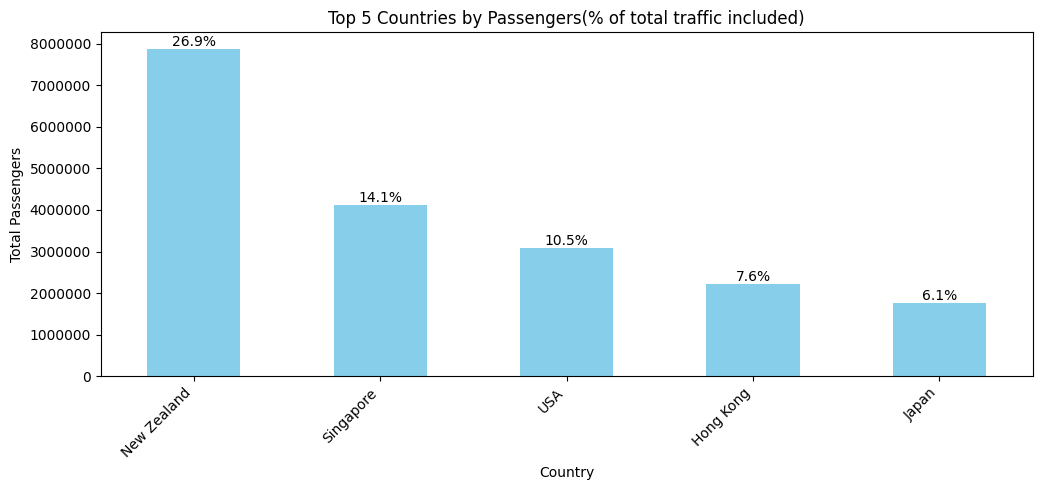


Australian Port Distribution:
Sydney: 15,499,688 passengers (52.9% of traffic)
Melbourne: 6,180,004 passengers (21.1% of traffic)
Brisbane: 3,153,897 passengers (10.8% of traffic)
Perth: 2,811,590 passengers (9.6% of traffic)
Adelaide: 604,937 passengers (2.1% of traffic)
Cairns: 474,393 passengers (1.6% of traffic)
Darwin: 277,604 passengers (0.9% of traffic)
Townsville: 110,539 passengers (0.4% of traffic)
Norfolk Island: 91,120 passengers (0.3% of traffic)
Hobart: 70,312 passengers (0.2% of traffic)
Port Hedland: 21,279 passengers (0.1% of traffic)


In [8]:

# 1b: most popular destination locations
# 1b: proportion of passengers categorized by original location


country_traffic = df.groupby('Country')['Passengers_Total'].sum().sort_values(ascending=False)
aus_port_traffic = df.groupby('AustralianPort')['Passengers_Total'].sum().sort_values(ascending=False)


# Calculate total passengers for percentage calculations
total_country_passengers = country_traffic.sum()
total_port_passengers = aus_port_traffic.sum()


print("\nGeographic Hotspots:")
print("Top 5 Countries:")
for i, (country, traffic) in enumerate(country_traffic.head(5).items(), 1):
  percentage = (traffic / total_country_passengers) * 100
  print(f"{i}. {country}: {traffic:,} passengers ({percentage:.1f}%)")
import matplotlib.pyplot as plt


# get top 5 countries
top5_countries = country_traffic.sort_values(ascending=False).head(5)


# compute percentages
percentages = (top5_countries / country_traffic.sum()) * 100


# plot
plt.figure(figsize=(10, 5))
bars = top5_countries.plot(kind='bar', color="skyblue")


plt.title("Top 5 Countries by Passengers(% of total traffic included)")
plt.ylabel("Total Passengers")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')


# add % labels above bars
for i, (value, pct) in enumerate(zip(top5_countries, percentages)):
   plt.text(i, value, f"{pct:.1f}%", ha='center', va='bottom', fontsize=10)


plt.show()


print("\nAustralian Port Distribution:")
for port, traffic in aus_port_traffic.items():
  pct = (traffic / total_port_passengers) * 100
  print(f"{port}: {traffic:,} passengers ({pct:.1f}% of traffic)")



In [9]:
from shapely.geometry import Point
from geopy.geocoders import Nominatim
import pandas as pd
import geopandas as gpd

# Initialize geolocator
geolocator = Nominatim(user_agent="port_mapper")

# Get all unique Australian ports from your data
aus_ports = df['AustralianPort'].unique()

# Create port coordinates dictionary using geocoding
port_coords = {}
for port in aus_ports:
    try:
        # Search for the port in Australia
        location = geolocator.geocode(f"{port}, Australia")
        if location:
            port_coords[port] = (location.latitude, location.longitude)
            print(f"Found {port}: {location.latitude:.4f}, {location.longitude:.4f}")
        else:
            print(f"Could not find coordinates for {port}")
    except Exception as e:
        print(f"Error geocoding {port}: {e}")

# Calculate passenger traffic by port (assuming you have this from your analysis)
aus_port_traffic = df.groupby('AustralianPort')['Passengers_Total'].sum()

# Build dataframe with coordinates and passenger data
port_data = []
for port, coords in port_coords.items():
    if port in aus_port_traffic.index:
        port_data.append({
            'port': port,
            'lat': coords[0],
            'lon': coords[1],
            'passengers': aus_port_traffic[port],
            'percentage': (aus_port_traffic[port] / aus_port_traffic.sum()) * 100
        })

# Create GeoDataFrame
ports_df = pd.DataFrame(port_data)
ports_gdf = gpd.GeoDataFrame(ports_df,
                           geometry=[Point(xy) for xy in zip(ports_df.lon, ports_df.lat)],
                           crs="EPSG:4326")

print(f"Created ports_gdf with {len(ports_gdf)} ports")
print(ports_gdf[['port', 'passengers', 'percentage']])

/Users/arjunsikka/PycharmProjects/dataGenerate/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found Adelaide: -34.9282, 138.5999
Found Brisbane: -27.4690, 153.0235
Found Cairns: -16.9207, 145.7722
Found Darwin: -12.4604, 130.8410
Found Hobart: -42.8825, 147.3281
Found Melbourne: -37.8142, 144.9632
Found Norfolk Island: -29.0328, 167.9483
Found Perth: -31.9559, 115.8606
Found Port Hedland: -20.3112, 118.5801
Found Sydney: -33.8698, 151.2083
Found Townsville: -19.2569, 146.8240
Created ports_gdf with 11 ports
              port  passengers  percentage
0         Adelaide      604937    2.064958
1         Brisbane     3153897   10.765857
2           Cairns      474393    1.619345
3           Darwin      277604    0.947604
4           Hobart       70312    0.240011
5        Melbourne     6180004   21.095502
6   Norfolk Island       91120    0.311039
7            Perth     2811590    9.597389
8     Port Hedland       21279    0.072636
9           Sydney    15499688   52.908332
10      Townsville      110539    0.377326


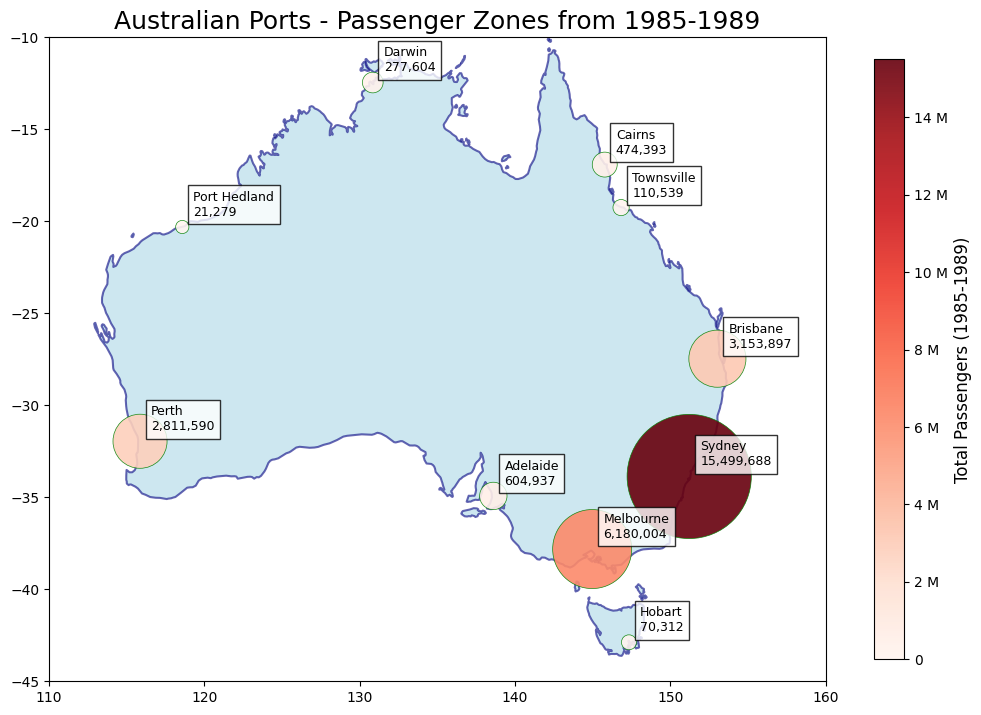

In [10]:
# 1c: australian map with starting ports
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter




url = 'https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_50m_admin_0_countries.geojson'


# load world map
world = gpd.read_file(url)




name_cols = ['NAME', 'NAME_EN', 'name', 'ADMIN']
australia = None
for col in name_cols:
   if col in world.columns:
       australia = world[world[col] == 'Australia']
       if australia is not None:
           break


# display the map
fig, ax = plt.subplots(1, 1, figsize=(16 * 0.65, 12 * 0.65))


if australia is not None and len(australia) > 0:
   # plot Australia
   australia.plot(ax=ax, color='lightblue', edgecolor='navy', linewidth=1.5, alpha=0.6)


   # calculate sizes with proportional scaling
   min_size = 80
   max_size = 8000
   percentages = ports_gdf['percentage']
   sizes = min_size + (percentages / percentages.max()) * (max_size - min_size)


   scatter = ax.scatter(ports_gdf['lon'], ports_gdf['lat'],
                   s=sizes,
                   c=ports_gdf['passengers'],
                   cmap='Reds',
                   vmin=0,
                   vmax=ports_gdf['passengers'].max(),
                   alpha=0.9,
                   edgecolors='green',
                   linewidth=0.5,
                   zorder=1)




   cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
   cbar.set_label('Total Passengers (1985-1989)', fontsize=12)


   cbar.ax.yaxis.set_major_formatter(EngFormatter())
   # annotate each port with name + passengers
   for idx, row in ports_gdf.iterrows():
       ax.annotate(f"{row['port']}\n{row['passengers']:,}",
                   xy=(row['lon'], row['lat']),
                   xytext=(8, 8), textcoords='offset points',
                   fontsize=9, ha='left',
                   bbox=dict(facecolor='white', alpha=0.8))


   ax.set_xlim(110, 160)
   ax.set_ylim(-45, -10)
   ax.set_title('Australian Ports - Passenger Zones from 1985-1989', fontsize=18,)


else:
   print("australia map not working")


plt.tight_layout()
plt.show()


In [11]:
from geopy.distance import geodesic as GD
from geopy.geocoders import Nominatim


In [12]:

city1 = "Adelaide"
city2 = "Auckland"
geolocator = Nominatim(user_agent="MyApp")
location_city1 = geolocator.geocode(city1)
location_city2 = geolocator.geocode(city2)
lat_long_city1 = (location_city1.latitude ,location_city1.longitude)
lat_long_city2 = (location_city2.latitude ,location_city2.longitude)
distance = GD(lat_long_city1 , lat_long_city2).km
print(f"The distance between {city1} and {city2} is { distance}")










The distance between Adelaide and Auckland is 3252.650600130042


In [13]:
from geopy import distance
from geopy.geocoders import Nominatim


geolocator = Nominatim(user_agent="MyApp")


# get unique routes with their total passengers
route_totals = df.groupby(['AustralianPort', 'ForeignPort'])['Passengers_Total'].sum().reset_index()


# calculate distances for each route
route_distances = []
print("Calculating distances for routes...")


for _, row in route_totals.iterrows():
   city1 = row['AustralianPort']


   city2 = row['ForeignPort']
   total_passengers = row['Passengers_Total']


   try:
       # get coordinates for both cities
       location_city1 = geolocator.geocode(city1)
       location_city2 = geolocator.geocode(city2)


       if location_city1 and location_city2:
           lat_long_city1 = (location_city1.latitude, location_city1.longitude)
           lat_long_city2 = (location_city2.latitude, location_city2.longitude)


           # calculate distance
           route_distance = distance.distance(lat_long_city1, lat_long_city2).km


           route_distances.append({
               'Route': f"{city1} <-> {city2}",
               'Distance_km': round(route_distance, 0),
               'Total_Passengers': total_passengers
           })


           print(f"{city1} <-> {city2}: {route_distance:.0f} km, {total_passengers:,} passengers")


   except Exception as e:
       print(f"Could not calculate distance for {city1} <-> {city2}: {e}")


# create DataFrame
distance_df = pd.DataFrame(route_distances)
print(f"\nSuccessfully calculated distances for {len(distance_df)} routes")





plt.figure(figsize=(14, 8))


if len(distance_df) > 0:
   # filter out routes
   distance_df_filtered = distance_df[distance_df['Total_Passengers'] >= 50000]


   # create scatter plot with filtered data
   plt.scatter(distance_df_filtered['Distance_km'], distance_df_filtered['Total_Passengers'],
              s=120, alpha=0.6, c='purple', edgecolors='darkblue')


   plt.xlabel('Distance (km)')
   plt.ylabel('Total Passengers (1985-1989)')
   plt.title('Route Distance vs Total Passenger Volume (filtered for at least 50000 passengers)', fontsize=16, fontweight='bold')
   plt.grid(True, alpha=0.3)


   plt.ylim(0, distance_df_filtered['Total_Passengers'].max() * 1.1)
   plt.ticklabel_format(style='plain', axis='y')  # Turn off scientific notation


   plt.tight_layout()
   plt.show()


   print(f"\nRoutes after filtering: {len(distance_df_filtered)}")
   print(f"Routes filtered out: {len(distance_df) - len(distance_df_filtered)}")

Calculating distances for routes...
Adelaide <-> Abu Dhabi: 11035 km, 243 passengers


KeyboardInterrupt: 